In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet


# Explore Incidence of Myocarditis in Vaccine Adverse Reaction data from: https://vaers.hhs.gov/
## A quick look at the fraction of reported adverse vaccine reactions that mention Myocarditis and the subsequent age and sex distributions

## Load in data (Downloaded 16 Nov 2021)

In [2]:
vaers_symptoms = pd.read_csv('2021VAERSSYMPTOMS.csv')

In [3]:
vaers_symptoms.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


### Use chardet pkg to determine encoding of vaers data

In [4]:
file = '2021VAERSDATA.csv'

In [5]:
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Load in vaers data with correct encoding to avoid errors

In [6]:
vaers_data = pd.read_csv('2021VAERSDATA.csv', encoding = 'ISO-8859-1')

/Users/isaacberez/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
vaers_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


### Get some quick info about vaers data

In [8]:
vaers_data.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [9]:
vaers_data.shape

(677514, 35)

### Test filter by keyword in symptom text

In [10]:
vaers_data['SYMPTOM_TEXT']


0         Right side of epiglottis swelled up and hinder...
1         Approximately 30 min post vaccination administ...
2         About 15 minutes after receiving the vaccine, ...
3         extreme fatigue, dizziness,. could not lift my...
4         Injection site swelling, redness, warm to the ...
                                ...                        
677509    Patient reports feeling marked presents profus...
677510    Error: Wrong Vaccine Formulation  (ex. differe...
677511              Moderna 3/12 and 4/9. Positive on 11/11
677512         Vaccine vial stored at incorrect temperature
677513    Systemic: Allergic: Itch (specify: facial area...
Name: SYMPTOM_TEXT, Length: 677514, dtype: object

In [11]:
vaers_data['SYMPTOM_TEXT'].str.contains('epiglottis')

0          True
1         False
2         False
3         False
4         False
          ...  
677509    False
677510    False
677511    False
677512    False
677513    False
Name: SYMPTOM_TEXT, Length: 677514, dtype: object

### Replace NANs and NAs with 0s to avoid issues later

In [12]:
vaers_data = vaers_data.replace(np.nan,0)

In [13]:
vaers_data = vaers_data.replace('Na',0)

In [14]:
vaers_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,0.0,F,0,Right side of epiglottis swelled up and hinder...,0,...,None,None,0,0,2,01/01/2021,0,Y,0,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,0.0,F,0,Approximately 30 min post vaccination administ...,0,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,0,0,2,01/01/2021,0,Y,0,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,0.0,F,0,"About 15 minutes after receiving the vaccine, ...",0,...,None,None,0,0,2,01/01/2021,0,0,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,0.0,F,0,"extreme fatigue, dizziness,. could not lift my...",0,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",0,2,01/01/2021,0,0,0,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,0.0,F,0,"Injection site swelling, redness, warm to the ...",0,...,0,0,0,0,2,01/01/2021,0,0,0,0


## Filter only reports that mention myocarditis

In [15]:
vaers_myo_mask = vaers_data['SYMPTOM_TEXT'].str.contains('myocarditis',case=False)

In [16]:
vaers_data.loc[vaers_myo_mask==True]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
2337,918971,01/04/2021,PA,58.0,0.0,0.0,M,0,chills; fever; bodyaches; fatigue; The initial...,0,...,0,Medical History/Concurrent Conditions: Blood p...,0,USPFIZER INC2020509672,2,12/30/2020,0,0,0,0
4952,921774,01/05/2021,0,51.0,51.0,0.0,F,0,Client stated at 10:48 she noticed chest tight...,0,...,0,0,0,0,2,0,0,0,0,0
5807,922594,01/06/2021,NH,36.0,36.0,0.0,F,0,A few hours after the vaccine my arm hurt. The...,0,...,0,asthma,0,0,2,01/06/2021,0,0,0,penicillin
20407,935452,01/11/2021,NM,44.0,44.0,0.0,F,0,"1/6/21 8pm started with Nasuea, vomiting, diar...",0,...,no,no,0,0,2,01/11/2021,0,0,0,NKDA
36098,952497,01/18/2021,IL,40.0,40.0,0.0,M,0,Patient with PMH of depression and GERD who pr...,0,...,0,none,0,0,2,01/18/2021,0,0,Y,NKDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676294,1862104,11/11/2021,GA,60.0,60.0,0.0,F,0,I had a heart attack (left ventricle damage/my...,0,...,RA,RA,Decadron,0,2,11/11/2021,0,0,0,"Paxil, Reglan, Decadron, Vitamin D2"
676405,1862385,11/11/2021,CO,40.0,40.0,0.0,M,0,In July 2021. After 1 month after my 2nd moder...,0,...,None.,None.,0,"022b21a, 016c21a",2,11/11/2021,0,Y,Y,None.
676989,1863895,11/12/2021,FL,79.0,0.0,0.0,F,0,Received the Pfizer BioNTech Covid-19 Booster ...,0,...,0,Medical History/Concurrent Conditions: Blood p...,0,USPFIZER INC202101317809,2,11/10/2021,0,0,0,0
677042,1863948,11/12/2021,PA,24.0,0.0,0.0,M,0,Myocarditis; This is a spontaneous report from...,0,...,0,Comments: List of non-encoded Patient Relevant...,0,USPFIZER INC202101480185,2,11/11/2021,0,Y,Y,0


In [17]:
vaers_myo = pd.DataFrame(vaers_data.loc[vaers_myo_mask==True])

In [18]:
(vaers_myo.shape[0])

2114

In [19]:
(vaers_data.shape[0])

677514

In [20]:
print('%.2f percent of VAERS reports mention myocarditis in symptoms' % ((vaers_myo.shape[0]/vaers_data.shape[0])*100))

0.31 percent of VAERS reports mention myocarditis in symptoms


In [21]:
vaers_myo

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
2337,918971,01/04/2021,PA,58.0,0.0,0.0,M,0,chills; fever; bodyaches; fatigue; The initial...,0,...,0,Medical History/Concurrent Conditions: Blood p...,0,USPFIZER INC2020509672,2,12/30/2020,0,0,0,0
4952,921774,01/05/2021,0,51.0,51.0,0.0,F,0,Client stated at 10:48 she noticed chest tight...,0,...,0,0,0,0,2,0,0,0,0,0
5807,922594,01/06/2021,NH,36.0,36.0,0.0,F,0,A few hours after the vaccine my arm hurt. The...,0,...,0,asthma,0,0,2,01/06/2021,0,0,0,penicillin
20407,935452,01/11/2021,NM,44.0,44.0,0.0,F,0,"1/6/21 8pm started with Nasuea, vomiting, diar...",0,...,no,no,0,0,2,01/11/2021,0,0,0,NKDA
36098,952497,01/18/2021,IL,40.0,40.0,0.0,M,0,Patient with PMH of depression and GERD who pr...,0,...,0,none,0,0,2,01/18/2021,0,0,Y,NKDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676294,1862104,11/11/2021,GA,60.0,60.0,0.0,F,0,I had a heart attack (left ventricle damage/my...,0,...,RA,RA,Decadron,0,2,11/11/2021,0,0,0,"Paxil, Reglan, Decadron, Vitamin D2"
676405,1862385,11/11/2021,CO,40.0,40.0,0.0,M,0,In July 2021. After 1 month after my 2nd moder...,0,...,None.,None.,0,"022b21a, 016c21a",2,11/11/2021,0,Y,Y,None.
676989,1863895,11/12/2021,FL,79.0,0.0,0.0,F,0,Received the Pfizer BioNTech Covid-19 Booster ...,0,...,0,Medical History/Concurrent Conditions: Blood p...,0,USPFIZER INC202101317809,2,11/10/2021,0,0,0,0
677042,1863948,11/12/2021,PA,24.0,0.0,0.0,M,0,Myocarditis; This is a spontaneous report from...,0,...,0,Comments: List of non-encoded Patient Relevant...,0,USPFIZER INC202101480185,2,11/11/2021,0,Y,Y,0


In [22]:
type(vaers_myo)

pandas.core.frame.DataFrame

In [23]:
vaers_myo['SYMPTOM_TEXT'][36098]

'Patient with PMH of depression and GERD who presented 1/8 with constipation, abdominal discomfort and worsening dyspnea. Symptoms began around 12/29. COVID vaccine 12/19. Previously quite active, marathon runner, gained some weight over last couple years but was still in good enough shape to complete 10K in New Orleans in early February. In late February, had a flu-like illness, as did one of his friends from church. 2020 was hard on him - weight gain, decreased activity, stress, overall deconditioning. No issues apart from sore arm after COVID vaccine 12/19 but then starting getting abdominal fullness/discomfort around 12/29, which steadily worsened, also develop worsening dyspnea on slight exertion. No known sick contacts.. Work-up notable for pericardial effusion, pleural effusions. Echo with severe diffuse LV hypokinesis, concern raised for myocarditis. COVID PCR negative, serology negative. RVP negative. . Concern raised that COVID vaccine may have played a role in myocarditis. H

In [24]:
vaers_myo.loc[vaers_myo['AGE_YRS']==0]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
44358,962036,01/21/2021,FL,0.0,0.0,0.0,M,0,idiosyncratic myocarditis; This spontaneous re...,0,...,0,0,0,US0095075132101USA009307,2,01/21/2021,0,0,0,0
79302,1001632,02/04/2021,0,0.0,0.0,0.0,U,0,Myocarditis; A spontaneous report was received...,0,...,0,Medical History/Concurrent Conditions: No adve...,0,"USMODERNATX, INC.MOD20210",2,02/04/2021,0,0,0,0
95416,1021922,02/11/2021,KY,0.0,35.0,0.0,M,0,Chest pain; Acute Myocarditis; Fever; A sponta...,0,...,0,Medical History/Concurrent Conditions: COVID-19,0,"USMODERNATX, INC.MOD20210",2,02/09/2021,0,0,0,0
123403,1056448,02/26/2021,MD,0.0,0.0,0.0,M,0,myocarditis; pericarditis; Chest pain; rapid h...,0,...,0,Medical History/Concurrent Conditions: No adve...,0,"USMODERNATX, INC.MOD20210",2,02/22/2021,0,0,0,0
196815,1142930,03/29/2021,PA,0.0,0.0,0.0,F,0,low white and red blood cells; low white and r...,0,...,0,Medical History/Concurrent Conditions: Chronic...,0,USPFIZER INC2021269321,2,03/25/2021,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667917,1848141,11/06/2021,0,0.0,0.0,0.0,M,0,MYOCARDITIS; PERICARDITIS; .This spontaneous r...,0,...,0,0,0,USJNJFOC20211109933,2,11/05/2021,0,0,0,0
668275,1848509,11/06/2021,NY,0.0,0.0,0.0,F,0,This is a spontaneous report from a contactabl...,0,...,0,Medical History/Concurrent Conditions: COVID-1...,0,USPFIZER INC202101417164,2,11/04/2021,0,Y,0,0
669613,1850058,11/08/2021,LA,0.0,0.0,0.0,F,0,SUCCUMBING; VEGETATION ON PULMONIC VALVE; DISS...,Y,...,0,Comments: The patient never had any health pro...,0,USJNJFOC20211103061,2,11/08/2021,0,0,0,0
672956,1856592,11/10/2021,0,0.0,0.0,0.0,F,0,SUCCUMBING; MYOCARDITIS; VEGETATION ON PULMONI...,Y,...,0,Comments: The patient never had any health pro...,0,USJNJFOC20211110984,2,11/09/2021,0,0,0,0


In [25]:
list(vaers_myo['AGE_YRS'])

[58.0,
 51.0,
 36.0,
 44.0,
 40.0,
 18.0,
 0.0,
 30.0,
 21.0,
 58.0,
 25.0,
 35.0,
 52.0,
 20.0,
 40.0,
 0.0,
 29.0,
 27.0,
 33.0,
 29.0,
 33.0,
 23.0,
 52.0,
 68.0,
 0.0,
 45.0,
 20.0,
 26.0,
 26.0,
 20.0,
 44.0,
 66.0,
 36.0,
 20.0,
 45.0,
 22.0,
 20.0,
 80.0,
 31.0,
 0.0,
 32.0,
 21.0,
 40.0,
 36.0,
 60.0,
 35.0,
 27.0,
 75.0,
 19.0,
 39.0,
 46.0,
 20.0,
 80.0,
 30.0,
 21.0,
 21.0,
 52.0,
 40.0,
 37.0,
 42.0,
 69.0,
 53.0,
 37.0,
 67.0,
 19.0,
 0.0,
 60.0,
 19.0,
 17.0,
 19.0,
 55.0,
 20.0,
 58.0,
 0.0,
 62.0,
 71.0,
 62.0,
 37.0,
 23.0,
 34.0,
 26.0,
 35.0,
 29.0,
 70.0,
 0.0,
 44.0,
 37.0,
 30.0,
 19.0,
 23.0,
 41.0,
 27.0,
 27.0,
 44.0,
 22.0,
 18.0,
 19.0,
 43.0,
 48.0,
 16.0,
 26.0,
 28.0,
 0.0,
 30.0,
 20.0,
 49.0,
 23.0,
 18.0,
 38.0,
 42.0,
 23.0,
 22.0,
 20.0,
 22.0,
 52.0,
 22.0,
 45.0,
 38.0,
 23.0,
 24.0,
 35.0,
 24.0,
 27.0,
 23.0,
 18.0,
 72.0,
 43.0,
 70.0,
 26.0,
 25.0,
 40.0,
 87.0,
 30.0,
 16.0,
 41.0,
 22.0,
 19.0,
 69.0,
 24.0,
 0.0,
 0.0,
 0.0,
 0.0,
 22.0,
 16.

In [26]:
age_myo_dict = {}
for item in list(vaers_myo['AGE_YRS']):
    if (item in age_myo_dict):
        age_myo_dict[item] += 1
    elif item != 0:
        age_myo_dict[item] = 1


In [27]:
age_myo_dict.keys()

dict_keys([58.0, 51.0, 36.0, 44.0, 40.0, 18.0, 30.0, 21.0, 25.0, 35.0, 52.0, 20.0, 29.0, 27.0, 33.0, 23.0, 68.0, 45.0, 26.0, 66.0, 22.0, 80.0, 31.0, 32.0, 60.0, 75.0, 19.0, 39.0, 46.0, 37.0, 42.0, 69.0, 53.0, 67.0, 17.0, 55.0, 62.0, 71.0, 34.0, 70.0, 41.0, 43.0, 48.0, 16.0, 28.0, 49.0, 38.0, 24.0, 72.0, 87.0, 61.0, 59.0, 73.0, 50.0, 63.0, 56.0, 15.0, 47.0, 82.0, 64.0, 14.0, 65.0, 78.0, 79.0, 76.0, 81.0, 12.0, 13.0, 57.0, 54.0, 77.0, 74.0, 86.0, 88.0, 85.0, 83.0, 90.0, 84.0, 94.0, 89.0])

In [28]:
age_myo_dict.values()

dict_values([10, 19, 35, 28, 31, 73, 23, 61, 39, 39, 16, 55, 40, 47, 29, 40, 6, 22, 38, 17, 62, 4, 34, 26, 13, 6, 66, 13, 17, 32, 21, 14, 7, 12, 96, 15, 17, 9, 31, 9, 16, 23, 14, 83, 35, 15, 33, 49, 11, 4, 5, 17, 14, 16, 15, 8, 116, 18, 2, 18, 83, 14, 4, 6, 5, 1, 38, 41, 17, 11, 3, 7, 2, 1, 1, 2, 1, 2, 1, 1])

In [29]:
sum(age_myo_dict.values())

1925

<IPython.core.display.Javascript object>


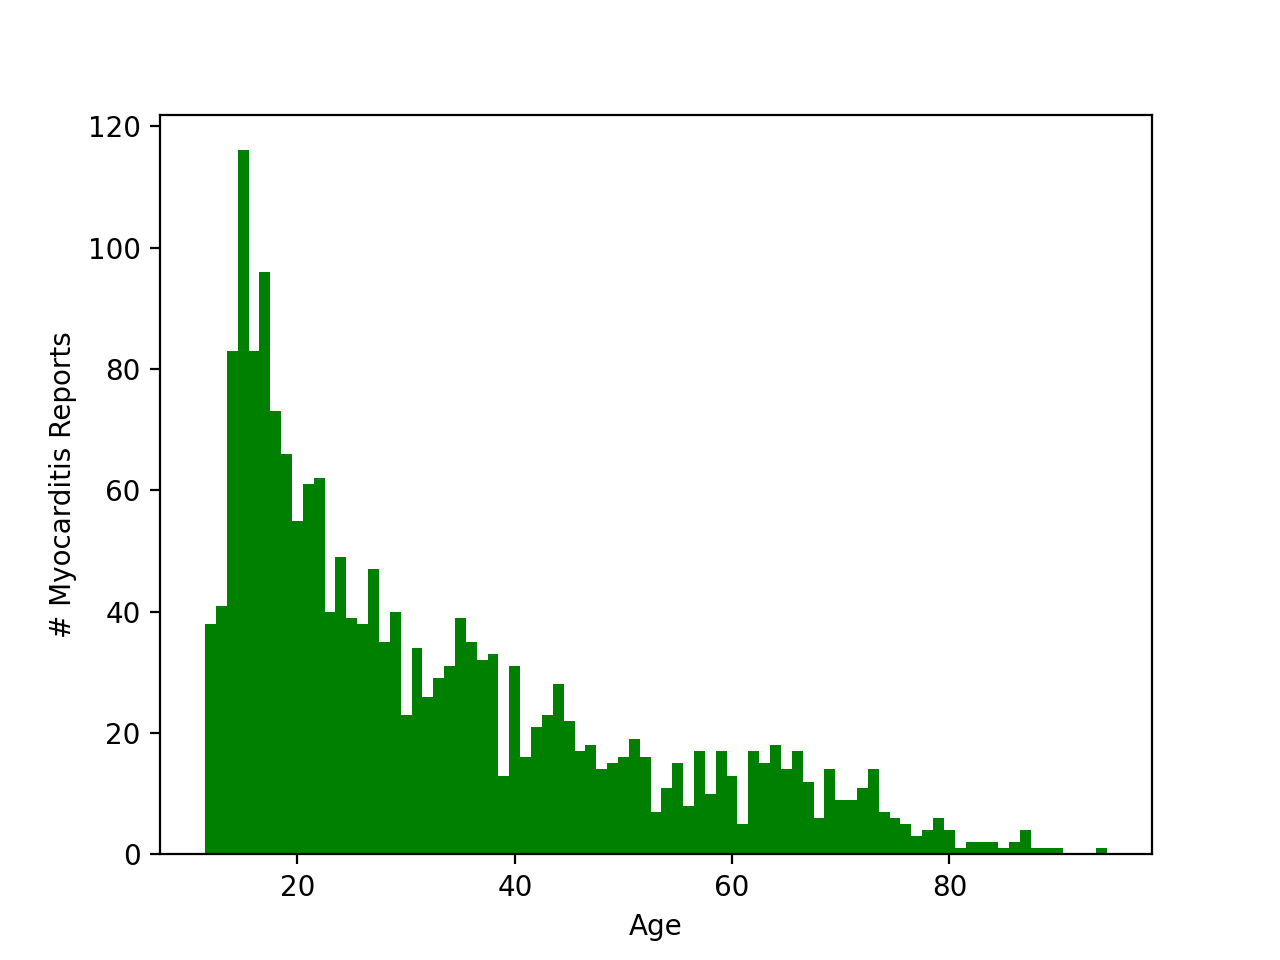

In [30]:
plt.figure('myocarditis reports age distribution')
plt.bar(age_myo_dict.keys(), age_myo_dict.values(), width=1,color='g')
plt.xlabel('Age')
plt.ylabel('# Myocarditis Reports')
plt.show()

In [31]:
sex_myo_dict = {}
for item in list(vaers_myo['SEX']):
    if (item in sex_myo_dict):
        sex_myo_dict[item] += 1
    else:
        sex_myo_dict[item] = 1

In [32]:
sex_myo_dict

{'M': 1449, 'F': 619, 'U': 46}

<IPython.core.display.Javascript object>


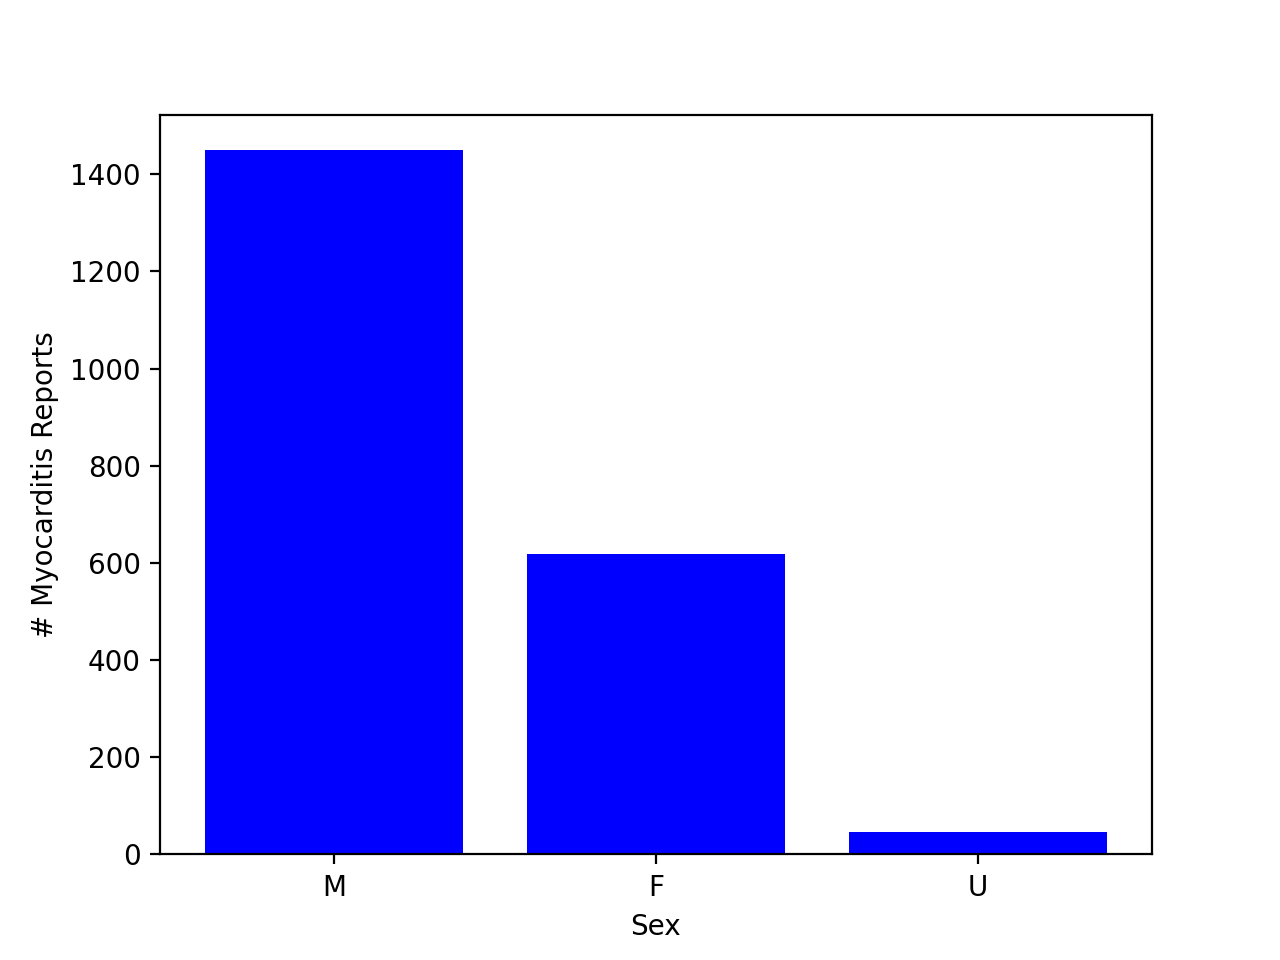

In [33]:
plt.figure('sex and myocarditis report distribution')
plt.bar(sex_myo_dict.keys(),sex_myo_dict.values(),color='b')
plt.xlabel('Sex')
plt.ylabel('# Myocarditis Reports')
plt.show()